In [1]:
import xml.etree.ElementTree as ET
import pandas as pd
import os

def convert_xml_to_csv(xml_path, csv_path):
    print(f"Processing {xml_path}...")
    try:
        tree = ET.parse(xml_path)
        root = tree.getroot()
        rows = [elem.attrib for elem in root]
        df = pd.DataFrame(rows)
        df.to_csv(csv_path, index=False)
        print(f"Saved to {csv_path}")
    except Exception as e:
        print(f"Failed to process {xml_path}: {e}")


In [3]:
xml_files = [
    "Badges.xml",
    "Comments.xml",
    "PostHistory.xml",
    "PostLinks.xml",
    "Posts.xml",
    "Tags.xml",
    "Users.xml",
    "Votes.xml"
]

for xml_file in xml_files:
    csv_file = xml_file.replace(".xml", ".csv")
    convert_xml_to_csv(xml_file, csv_file)


Processing Badges.xml...
Saved to Badges.csv
Processing Comments.xml...
Saved to Comments.csv
Processing PostHistory.xml...
Saved to PostHistory.csv
Processing PostLinks.xml...
Saved to PostLinks.csv
Processing Posts.xml...
Saved to Posts.csv
Processing Tags.xml...
Saved to Tags.csv
Processing Users.xml...
Saved to Users.csv
Processing Votes.xml...
Saved to Votes.csv


In [67]:
import pandas as pd

# Load CSV files
badges_df = pd.read_csv("Badges.csv", low_memory=False)
comments_df = pd.read_csv("Comments.csv", low_memory=False)
posthistory_df = pd.read_csv("PostHistory.csv", low_memory=False)
postlinks_df = pd.read_csv("PostLinks.csv", low_memory=False)
posts_df = pd.read_csv("Posts.csv", low_memory=False)
tags_df = pd.read_csv("Tags.csv", low_memory=False)
users_df = pd.read_csv("Users.csv", low_memory=False)
votes_df = pd.read_csv("Votes.csv", low_memory=False)

print("All files loaded.")


All files loaded.


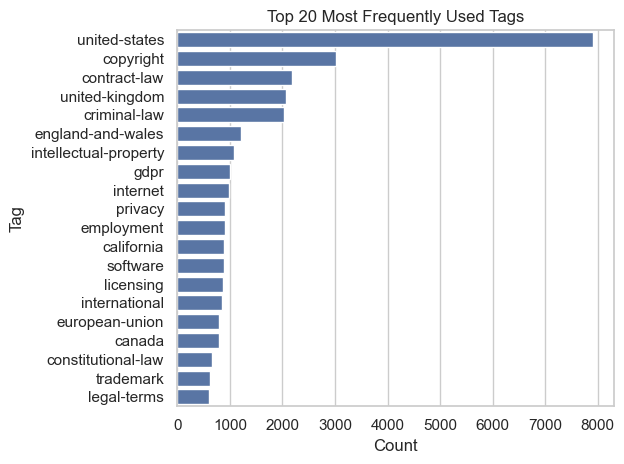

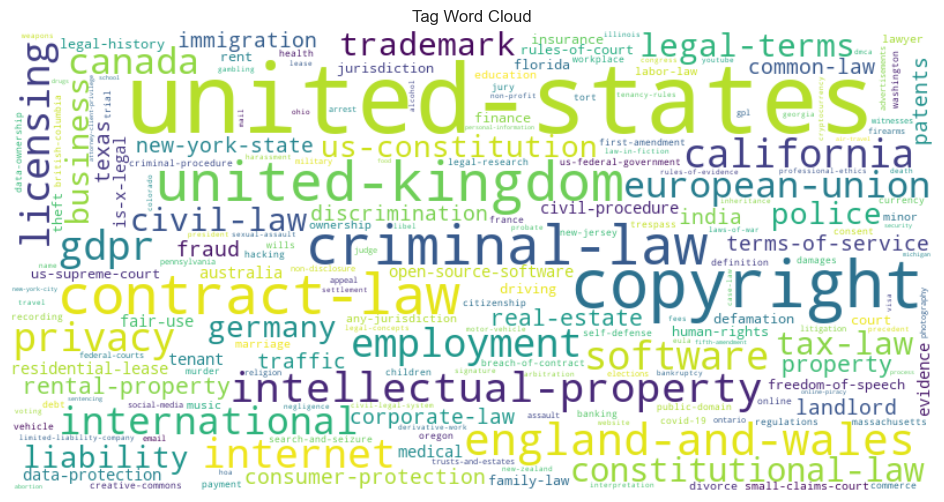

In [77]:
import re
from collections import Counter

# Drop NaNs and flatten tag lists
tags = posts_df['Tags'].dropna()
tag_list = []

for t in tags:
    tag_list.extend(re.findall(r'\|([^|]+)', t))

tag_counts = Counter(tag_list)
top_tags_df = pd.DataFrame(tag_counts.most_common(20), columns=["Tag", "Count"])

# Plot
sns.barplot(data=top_tags_df, x="Count", y="Tag")
plt.title("Top 20 Most Frequently Used Tags")
plt.tight_layout()
plt.show()
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_counts)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Tag Word Cloud")
plt.show()

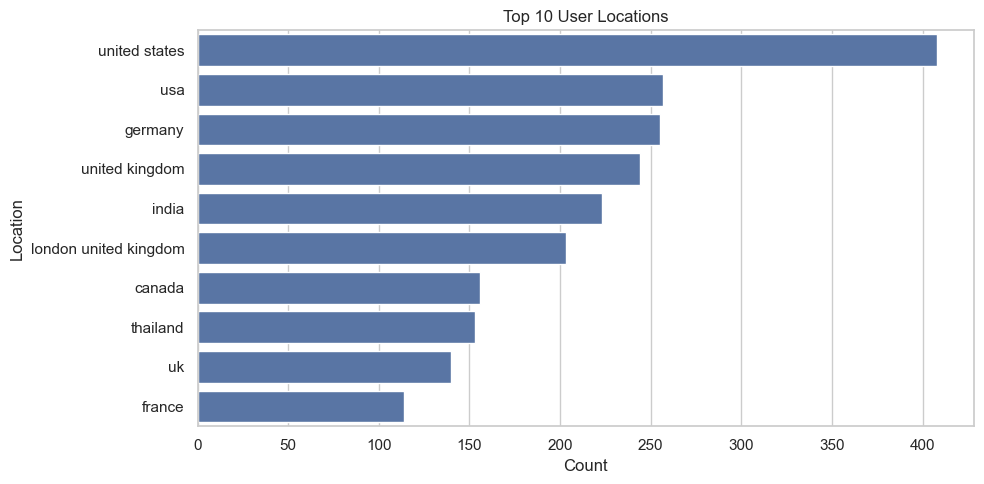

In [71]:
locations = users_df['Location'].dropna().str.lower()

# Clean: remove non-letter characters and extra spaces
clean_locations = locations.apply(lambda x: ' '.join(re.findall(r'[a-zA-Z]+', x)))

# Count top 10 locations
location_counts = Counter(clean_locations)
top_locations = pd.DataFrame(location_counts.most_common(10), columns=["Location", "Count"])

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=top_locations, x="Count", y="Location")
plt.title("Top 10 User Locations")
plt.tight_layout()
plt.show()


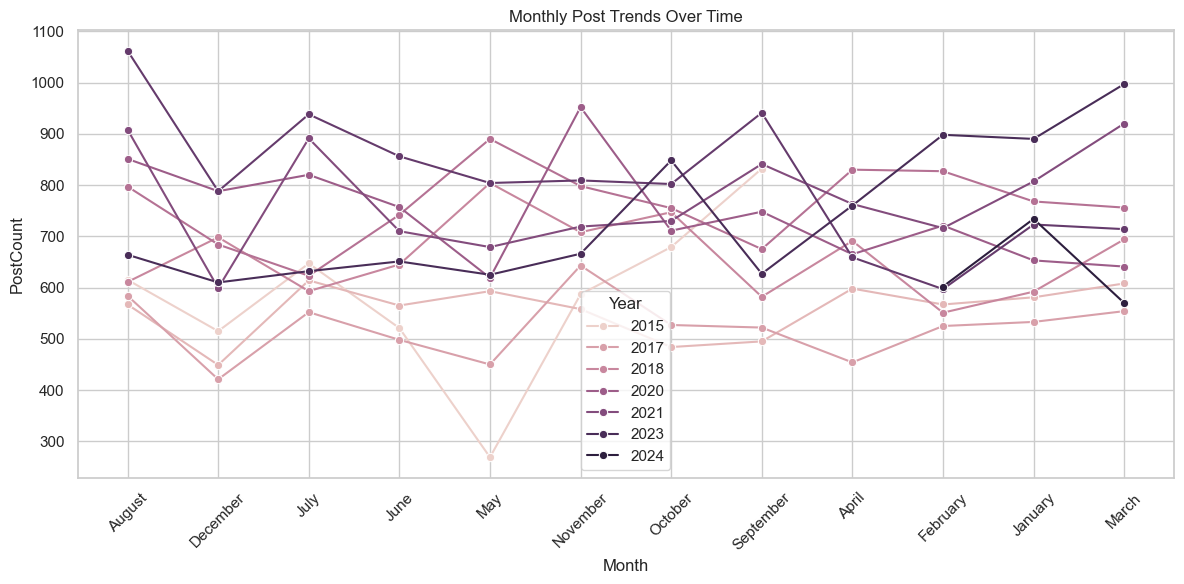

In [73]:
# Convert 'CreationDate' to datetime and extract year and month
posts_df['CreationDate'] = pd.to_datetime(posts_df['CreationDate'])
posts_df['Year'] = posts_df['CreationDate'].dt.year
posts_df['Month'] = posts_df['CreationDate'].dt.month_name()

# Count the number of posts per month
post_trends = posts_df.groupby(['Year', 'Month']).size().reset_index(name='PostCount')

# Plot the trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=post_trends, x='Month', y='PostCount', hue='Year', marker='o')
plt.title("Monthly Post Trends Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


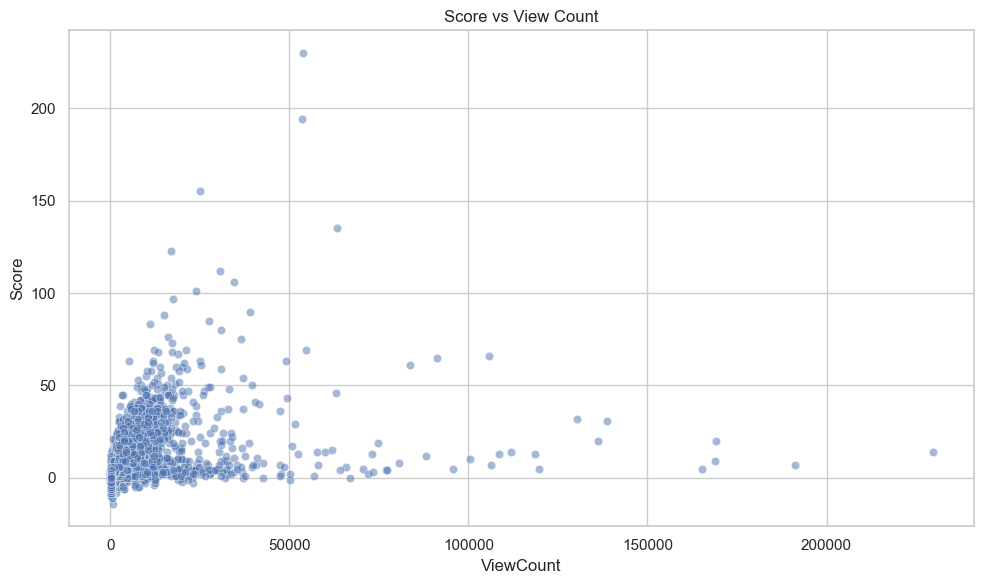

In [75]:
# Scatter plot of Score vs ViewCount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=posts_df, x='ViewCount', y='Score', alpha=0.5)
plt.title("Score vs View Count")
plt.tight_layout()
plt.show()


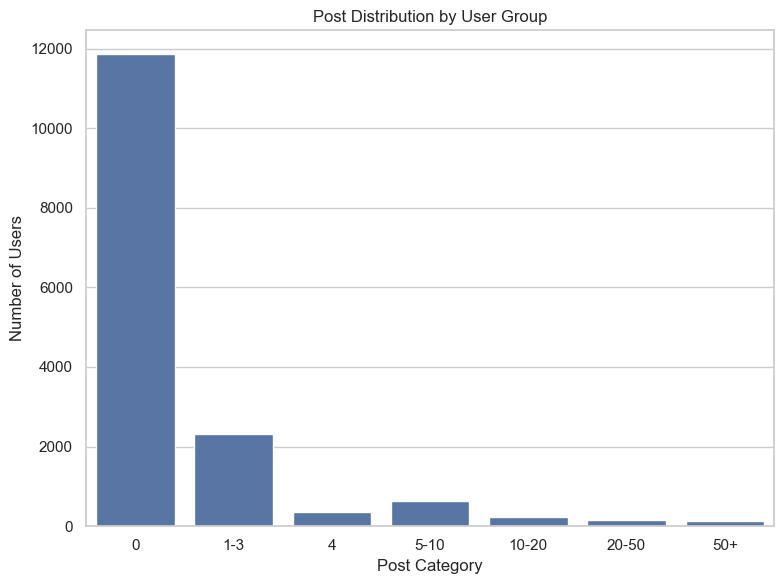

In [97]:
# Define bins and labels correctly
bins = [0, 1, 3, 4, 10, 20, 50, float('inf')]
labels = ['0', '1-3', '4', '5-10', '10-20', '20-50', '50+']  # 6 labels for 7 bins

# Categorize users based on number of posts
posts_per_user['PostCategory'] = pd.cut(posts_per_user['Id'], bins=bins, labels=labels)

# Plot the distribution of users in each category
plt.figure(figsize=(8, 6))
sns.countplot(data=posts_per_user, x='PostCategory')
plt.title("Post Distribution by User Group")
plt.xlabel("Post Category")
plt.ylabel("Number of Users")
plt.tight_layout()
plt.show()


/var/folders/k_/xq_dwbsn2pg2xl1z2xg8cpr40000gn/T/ipykernel_44992/1619800772.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
/var/folders/k_/xq_dwbsn2pg2xl1z2xg8cpr40000gn/T/ipykernel_44992/1619800772.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
/var/folders/k_/xq_dwbsn2pg2xl1z2xg8cpr40000gn/T/ipykernel_44992/1619800772.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)


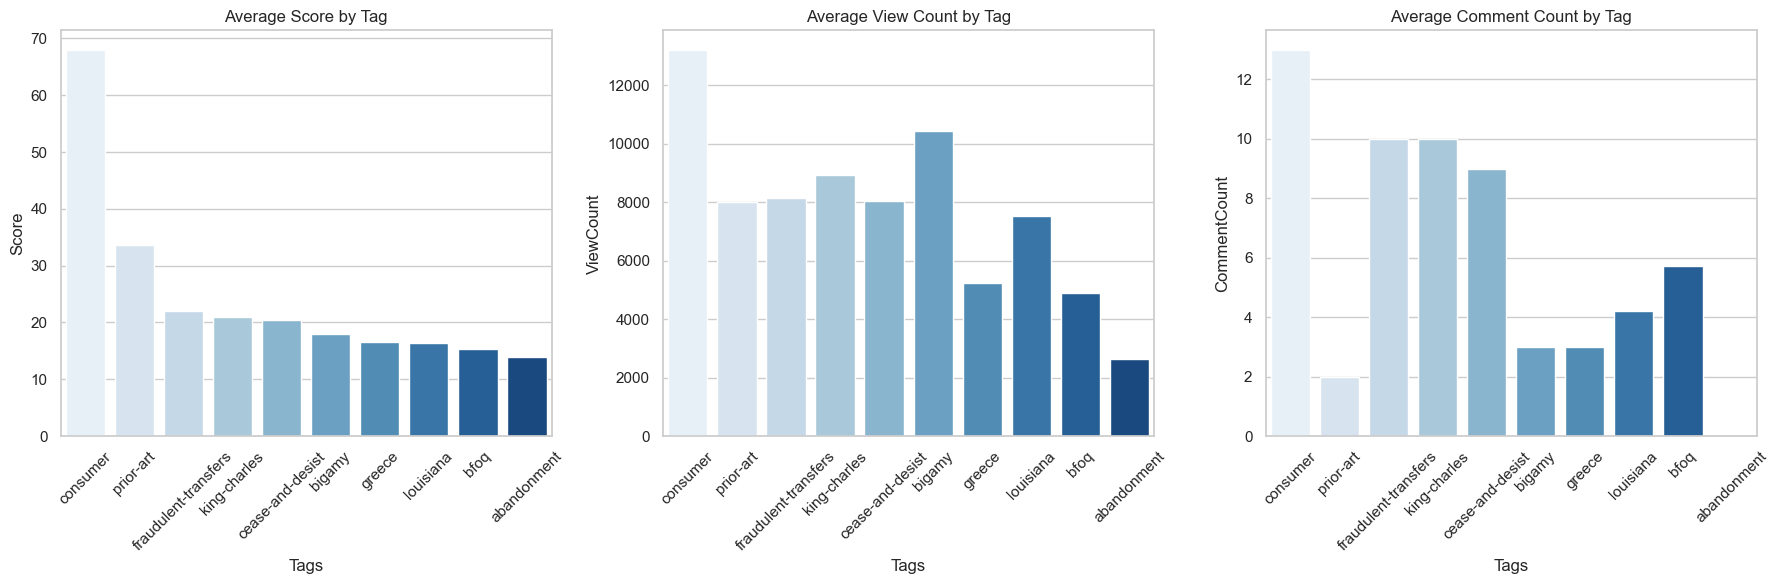

In [101]:
# Plot the engagement for the top tags
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(data=top_tag_engagement, x='Tags', y='Score', hue='Tags', dodge=False, legend=False, palette='Blues', ax=axes[0])
axes[0].set_title("Average Score by Tag")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

sns.barplot(data=top_tag_engagement, x='Tags', y='ViewCount', hue='Tags', dodge=False, legend=False, palette='Blues', ax=axes[1])
axes[1].set_title("Average View Count by Tag")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

sns.barplot(data=top_tag_engagement, x='Tags', y='CommentCount', hue='Tags', dodge=False, legend=False, palette='Blues', ax=axes[2])
axes[2].set_title("Average Comment Count by Tag")
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()
